In [146]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import sklearn
%matplotlib inline

# Data Preprocessing

In [15]:
df = pd.read_csv('C:/Users/weiji/OneDrive/Desktop/hdbdata/resale-flat-merged.csv')

In [78]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
country                 object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
remaining_lease        float64
resale_price           float64
year                    object
dtype: object

In [16]:
df.head()

,month,town,flat_type,block,street_name,country,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,10 TO 12,31.0,IMPROVED,1977.0,NaN,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,04 TO 06,31.0,IMPROVED,1977.0,NaN,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,10 TO 12,31.0,IMPROVED,1977.0,NaN,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,07 TO 09,31.0,IMPROVED,1977.0,NaN,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,SINGAPORE,04 TO 06,73.0,NEW GENERATION,1976.0,NaN,47200.0


There are some variables that might not be needed in the model, can remove it and select the ones that would be of use

In [131]:
# Split the month and year
df = pd.read_csv('C:/Users/weiji/OneDrive/Desktop/hdbdata/resale-flat-merged.csv')
df['year'] = df.month.str.split('-').str.get(0)
df['month'] = df.month.str.split('-').str.get(1) 
df.head(10)

,month,town,flat_type,block,street_name,country,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,10 TO 12,31.0,IMPROVED,1977.0,NaN,9000.0,1990
1,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,04 TO 06,31.0,IMPROVED,1977.0,NaN,6000.0,1990
2,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,10 TO 12,31.0,IMPROVED,1977.0,NaN,8000.0,1990
3,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,SINGAPORE,07 TO 09,31.0,IMPROVED,1977.0,NaN,6000.0,1990
4,01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,SINGAPORE,04 TO 06,73.0,NEW GENERATION,1976.0,NaN,47200.0,1990
5,01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,SINGAPORE,01 TO 03,67.0,NEW GENERATION,1977.0,NaN,46000.0,1990
6,01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,SINGAPORE,07 TO 09,67.0,NEW GENERATION,1977.0,NaN,42000.0,1990
7,01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,SINGAPORE,10 TO 12,67.0,NEW GENERATION,1977.0,NaN,38000.0,1990
8,01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,SINGAPORE,04 TO 06,67.0,NEW GENERATION,1977.0,NaN,40000.0,1990
9,01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,SINGAPORE,01 TO 03,67.0,NEW GENERATION,1977.0,NaN,47000.0,1990


In [132]:
#get age of flat from lease commence date
df['flat_age'] = 2018-df['lease_commence_date']

In [133]:
selected_features_list = ['town','flat_type','floor_area_sqm','flat_model','lease_commence_date', 'year', 'resale_price', 'storey_range', 'flat_age']

df = df [selected_features_list]
df.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,year,resale_price,storey_range,flat_age
0,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977.0,1990,9000.0,10 TO 12,41.0
1,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977.0,1990,6000.0,04 TO 06,41.0
2,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977.0,1990,8000.0,10 TO 12,41.0
3,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977.0,1990,6000.0,07 TO 09,41.0
4,ANG MO KIO,3 ROOM,73.0,NEW GENERATION,1976.0,1990,47200.0,04 TO 06,42.0


In [134]:
len(df.index)

789099

In [172]:
#remove rows with na values
df = df.dropna()

In [173]:
len(df.index)

789098

removed one NA row

# Descriptive analyses

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

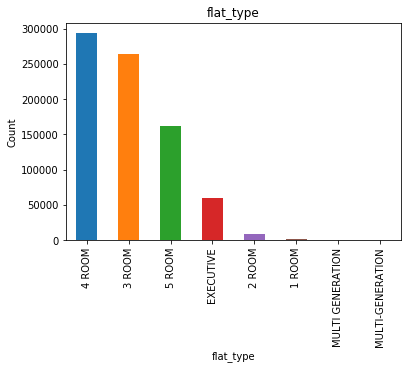

In [178]:
#look at number of flat types
df['flat_type'].value_counts().plot(kind='bar')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Floor Area')

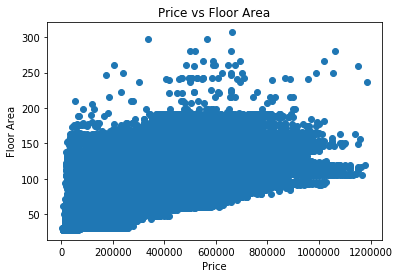

In [179]:
#look at price based on floor area
plt.scatter(df.resale_price,df.floor_area_sqm)
plt.xlabel('Price')
plt.ylabel('Floor Area')
plt.title("Price vs Floor Area")

# Check if data violates normality assumptions

In [ ]:
#check skewness and kurtosis

# Linear Regression Model

In [193]:
#To use linear regression to predict the prices. 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()

In [181]:
# Split up the categorical and continous features
cont_columns = []
cat_columns = []

for x in df.columns:
    if df[x].dtype == 'float':
        cont_columns.append(x)
    elif df[x].dtype == 'int64':
        cont_columns.append(x)
    elif df[x].dtype == 'object':
        cat_columns.append(x)

In [189]:
print(cont_columns)
print(cat_columns)

['floor_area_sqm', 'lease_commence_date', 'year', 'resale_price', 'flat_age']
['town', 'flat_type', 'flat_model', 'storey_range']


In [220]:
labels = df['resale_price']
conv_dates = [0 if values == 2018 else 1 for values in df.year ]
df['year'] = conv_dates
train1 = df.drop(['town','flat_type','flat_model','storey_range','resale_price','lease_commence_date'],axis=1)

In [221]:
from sklearn.model_selection import train_test_split


In [222]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)


In [223]:
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [224]:
reg.score(x_test,y_test)


0.4415006303056423

Accuracy of prection of resale value is only 44%

In [225]:
reg_pred = reg.predict(x_test) 
print('Variance score: %.2f' % r2_score(y_test, reg_pred))


Variance score: 0.44


the continous variables predicted 44% of variance in resale prices. Seems odd as the number is same as the accuracy figure

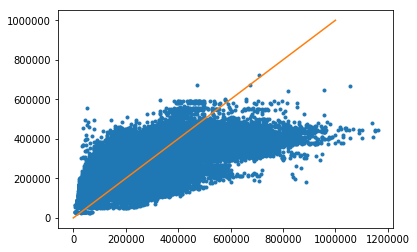

In [226]:
#plot the linear regression results on a graph
plt.plot(y_test, reg_pred, '.')
x = np.linspace (0, 1000000, 50000)
y = x
plt.plot(x, y)
plt.show()

In [227]:
#Try using gradient boosting
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [228]:
clf.fit(x_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [229]:
clf.score(x_test,y_test)


0.5446101839701555

using Gradient boosting method, the accuracy of the model increased by 10%